# Demo for problem generation 

In [1]:
import matplotlib.pyplot as plt
from ltfatpy import plotdgt, tfplot
from experiments.experiment import PhasecutExperiment, get_stft_operators
from experiments.experiment_var_width import exp_instances, create_exp
from problem_generation import generate_chirp_dirac_noise, generate_random_missing_phases

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 7, 7
mpl.rcParams['font.size'] = 22


Instance pcwd_final
Signal parameters:
    - signal length: 128
    - sampling frequency: 500
    - Chirp 1 in range [0, 200]Hz
    - Chirp 2 in range [200, 150]Hz
    - SNR: 10dB
STFT parameters:
    - window: hann
    - window length: 16
    - hop size: 8
    - number of bins: 32
    - phase convention: freqinv
45 tasks
Widths of holes: [1 3 5 7 9]
Ratios of missing data: [0.1 0.3 0.5]
Solvers: ['RPI', 'GLI', 'PCI']
GLI params: 6000 iterations
PCI params: 50000 iterations, nu=1e-14



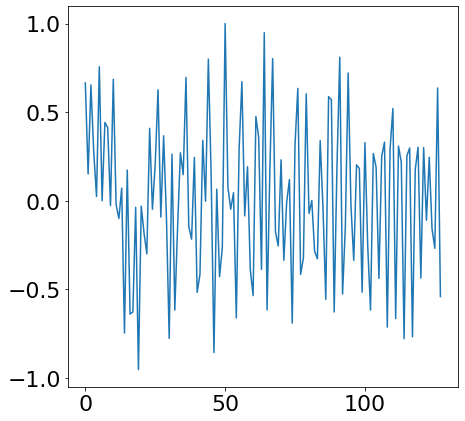

In [2]:
name = 'pcwd_final'
missing_ratio=0.2
width = 5
exp = create_exp(name)
exp = PhasecutExperiment.load_exp(name)

x = generate_chirp_dirac_noise(**exp.sig_params)
plt.figure()
plt.plot(x)
plt.savefig('signal.pdf', bbox_inches='tight')
plt.show()

stft, istft = exp.get_stft_operators()
X_ref = stft(x)
B, M = generate_random_missing_phases(X_ref,
                                      missing_ratio=missing_ratio,
                                      width=width)


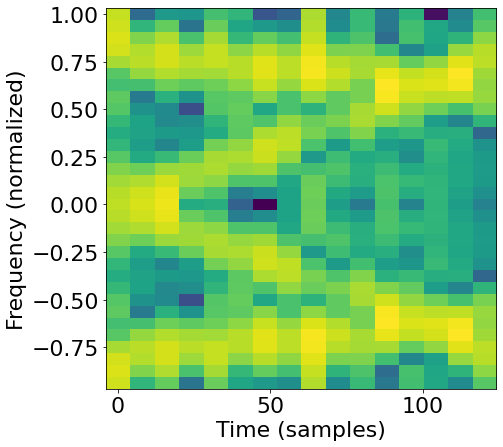

{'win_type': 'hann', 'win_len': 16, 'hop': 1, 'nb_bins': 128, 'phase_conv': 'freqinv'}


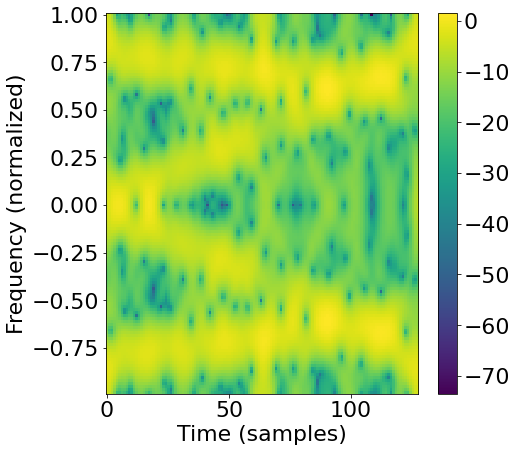

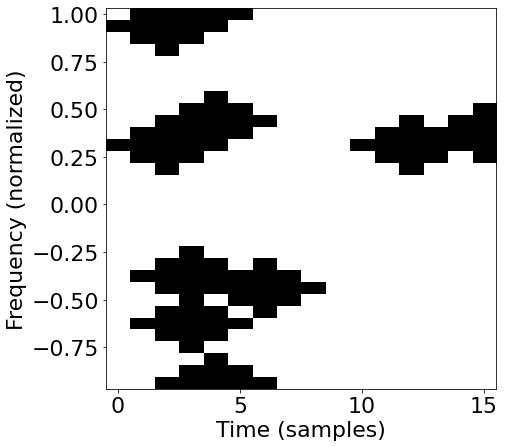

In [3]:
plt.figure()
plotdgt(coef=B, a=exp.stft_params['hop'], colorbar=False)
plt.savefig('spectro.pdf', bbox_inches='tight')
plt.show()

stft_params = exp.stft_params
stft_params['hop'] = 1
stft_params['nb_bins'] = exp.sig_params['sig_len']
print(stft_params)
stft, _, _ = get_stft_operators(sig_len=exp.sig_params['sig_len'],
                                 **stft_params)
X = stft(x)

fig=plt.figure()
plotdgt(coef=X, a=1)
plt.savefig('smooth_spectro.pdf', bbox_inches='tight')
plt.show()

plt.figure()
plotdgt(coef=M, a=exp.stft_params['hop'], colorbar=False)
plt.set_cmap('gray')
plt.savefig('mask.pdf', bbox_inches='tight')
plt.show()
